Before running this notebook make sure following libraries are installed :-  
`Numpy` can be installed using `!pip install numpy`  
`pandas` can be installed using `!pip install pandas`  
`mlxtend` can be installed using `!pip install mlxtend`  
`matplotlib` can be installed using `!pip install matplotlib`  
`seaborn` can be installed using `!pip install seaborn`  

[Link to the Report](https://www.canva.com/design/DAGMopjHOUM/1rfTWQG9V0aoI8r8pT8NFw/edit?utm_content=DAGMopjHOUM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

### Importing Libraries
---

In [171]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data
---

In [172]:
data = pd.read_csv('data/session_data.csv')

In [173]:
data.head()

,session_id,product_name
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber
2,0013eab657eaf2d82d7f1e13023d95c2,onion
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk
4,0013fabde1e543dd541be925266aadbc,dates


### Exploratory Data Analysis
---

**Checking for NULL values**

In [174]:
data.isna().sum()

session_id      0
product_name    0
dtype: int64

Seems like we are good to go as there are **NO NULL** values in any column.  
Now Let's see the histogram of **Number of Purchases per Product**

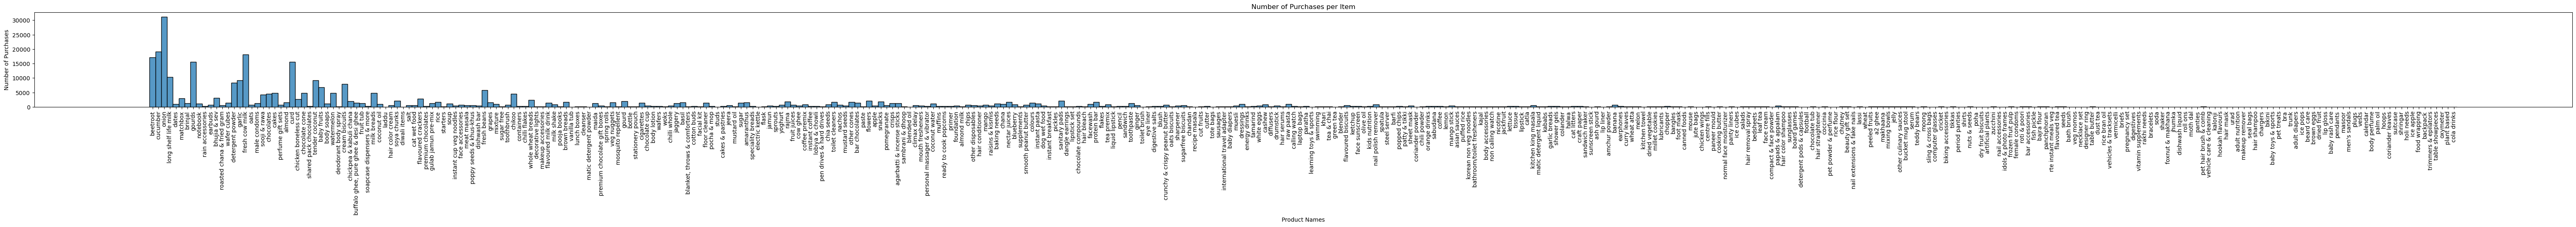

In [177]:
plt.figure(figsize=(80, 3))
sns.histplot(data['product_name'], discrete=True, kde=False)
plt.xlabel('Product Names')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases per Item')
plt.xticks(rotation=90)
plt.show()

(double click the above plot to expand it or [Click Here to view it](https://drive.google.com/drive/folders/1LyiLEfMbpcE76O2MV2ZOacHTU5VHVtvm))

As the histogram plot states, **Most buyed items are** :-   
1. onion  
2. cucumber
3. fresh cow milk 
4. beetroot
5. curd  
6. gourds  
etc.
     
**So it seems beneficial for the Business to try to keep above items always available in Stock.**

In [176]:
total_items = np.unique(data['product_name'].values).shape[0]
data['sessionId'] = pd.factorize(data['session_id'])[0]
total_sessions = np.max(data['sessionId'].values) + 1

In [178]:
print("Total number of distinct items purchased through all sessions given in data : ", total_items)
print("Total number of sessions settled by the store : ", total_sessions)

Total number of distinct items purchased through all sessions given in data :  396
Total number of sessions settled by the store :  165335


**Scope for improvement** : The above data (Total number of sessions settled by the store) can help in calculating the average speed of settling the transactions by the stores, Let's say if we would have been given the time of all sessions then we can calculate the speed or frequency of settling the transactions.   
**This can really help in analyzing & keeping track of the performance of Store or Business.**

In [179]:
transactions = data.groupby('sessionId')['product_name'].apply(list).values.tolist()

In [180]:
len(transactions) # transactions list is storing all purchases of all session ids

165335

Let's answer the following also :-  
"How many products is purchased in each distinct session ?"  
"What is the average no. of products buyed ?"

In [181]:
no_of_transactions = np.array([])
for purchase in transactions:
    no_of_transactions = np.append(no_of_transactions, len(purchase))
no_of_transactions = no_of_transactions.astype('int')

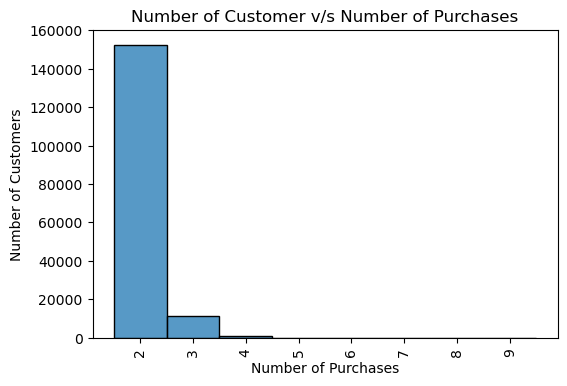

In [182]:
plt.figure(figsize=(6, 4))
sns.histplot(no_of_transactions, discrete=True, kde=False)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Number of Customer v/s Number of Purchases')
plt.xticks(rotation=90)
plt.show()

Most people were buying **2** items from the store  
maximum items buyed by a customer is **9** whereas the minimum is **2**  
On an average people buy **~2** items from store

### Building the Model :-
---

In [107]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [116]:
# Tunable parameters :-
# min_support
# min_threshold (for lift)

In [121]:
frequent_itemsets = apriori(df_encoded, min_support=0.0005, use_colnames=True)

In [122]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1) # Adjust lift

In [123]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(agarbatti & incense sticks),(matchbox),0.007518,0.018175,0.001651,0.219630,12.084031,0.001515,1.258153,0.924194
1,(matchbox),(agarbatti & incense sticks),0.018175,0.007518,0.001651,0.090849,12.084031,0.001515,1.091657,0.934226
2,(cashew),(almond),0.004700,0.009236,0.000992,0.211068,22.853283,0.000949,1.255830,0.960758
3,(almond),(cashew),0.009236,0.004700,0.000992,0.107400,22.853283,0.000949,1.115058,0.965157
4,(almond),(raisins & kismis),0.009236,0.002788,0.000514,0.055665,19.963825,0.000488,1.055993,0.958764
...,...,...,...,...,...,...,...,...,...,...
385,"(gourds, garlic)","(beetroot, cucumber)",0.010276,0.051985,0.000544,0.052972,1.018986,0.000010,1.001042,0.018825
386,(beetroot),"(cucumber, gourds, garlic)",0.103287,0.001585,0.000544,0.005270,3.325787,0.000381,1.003705,0.779870
387,(cucumber),"(beetroot, gourds, garlic)",0.115420,0.001845,0.000544,0.004716,2.556588,0.000331,1.002885,0.688297
388,(gourds),"(beetroot, cucumber, garlic)",0.094505,0.002189,0.000544,0.005760,2.630745,0.000337,1.003591,0.684575


In [149]:
def get_recommendations(cart_items, rules, confidence_score = None):
    recommendations = []
    for index, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        if antecedents.issubset(cart_items):
            if confidence_score != None and rule['confidence'] < confidence_score:
                continue
            addins = set(rule['consequents']) - set(cart_items)
            recommendations.extend(addins)
    return list(set(recommendations))

### Generating Recommendations
---

In [166]:
cart = ['matchbox', 'cucumber'] # current cart items
recommendations = get_recommendations(cart, rules)
print("Recommendations generated without confidence score thresholding for cart items", cart , " : \n", recommendations)
print("\n")
recommendations_confi_score = get_recommendations(cart, rules, confidence_score=0.09)
print("Recommendations generated with confidence score thresholding for cart items", cart ," : \n", recommendations_confi_score)

Recommendations generated without confidence score thresholding for cart items ['matchbox', 'cucumber']  : 
 ['fruit juices', 'watermelon', 'fresh beans', 'gourds', 'sooji & rawa', 'beetroot', 'fresh cow milk', 'curd', 'garlic', 'flowers', 'detergent powder', 'blueberry', 'agarbatti & incense sticks']


Recommendations generated with confidence score thresholding for cart items ['matchbox', 'cucumber']  : 
 ['watermelon', 'gourds', 'beetroot', 'curd', 'garlic', 'agarbatti & incense sticks']


In [169]:
cart = ['almond'] # current cart items
recommendations = get_recommendations(cart, rules)
print("Recommendations generated without confidence score thresholding for cart items", cart , " : ", recommendations)
print("\n")
recommendations_confi_score = get_recommendations(cart, rules, confidence_score=0.01)
print("Recommendations generated with confidence score thresholding for cart items", cart ," : ", recommendations_confi_score)

Recommendations generated without confidence score thresholding for cart items ['almond']  :  ['cashew', 'raisins & kismis']


Recommendations generated with confidence score thresholding for cart items ['almond']  :  ['cashew', 'raisins & kismis']
